刚开始学习jsp, servlet的时候, 各种配置tomcat, 什么war包, 以及url匹配, 不小心URL匹配写错了, 就导致找不到页面, 记得第一次学习的时候弄了好几天, 才弄出来页面, 真的很容易劝退, 现在想想, 或许并没有必要绕远路去学习jsp, servlet, 不如直接从spring boot开始, 等掌握了大概, 再慢慢了解具体tomcat是什么, spring的本质, 因为刚开始的我们, 什么都不懂, 只是看一些高大上的解释, 比如说刚开始还没接触spring, 就去看什么IoC, AOP, 去看什么spring mvc, EJB, 你真想弄懂, 那先把spring作者的那本为啥spring要代替Java ee看了吧, 看的时候里面肯定有新的概念, 比如EJB, 你会发现你进入了个循环,,,, 当你就让你去查各种解释, 你会发现解释的东西都是在根据实际的开发为例子, 告诉你解决了什么问题, 可是我们还没接触呢, 鬼知道这都是啥, 用了之后再去了解, 可能效率会更高, 更快, 直接硬理解, 真的有点ummmm蠢, 当然, 我也是看了教程就觉得那些大佬很牛, 就是这么干, 刚开始, 其实学会用了spring, 再去研究jsp, 或许会有另一番风景, 这就像, 你初中了去看小学的概念, 肯定会站在更高的角度看待问题, 而且效率会更高, 但让你小学就去先理解初中的知识, 使劲查背后的原理, 我并不觉得你能查明白, 

# 1. Init
---

发现Spring真的好方便, 加几个注解, 也不用在xml配置servlet, 按照如下操作, 然后就可以直接处理来自访问`http://localhost:8080/hello`的http请求了, 应该给spring加鸡腿~

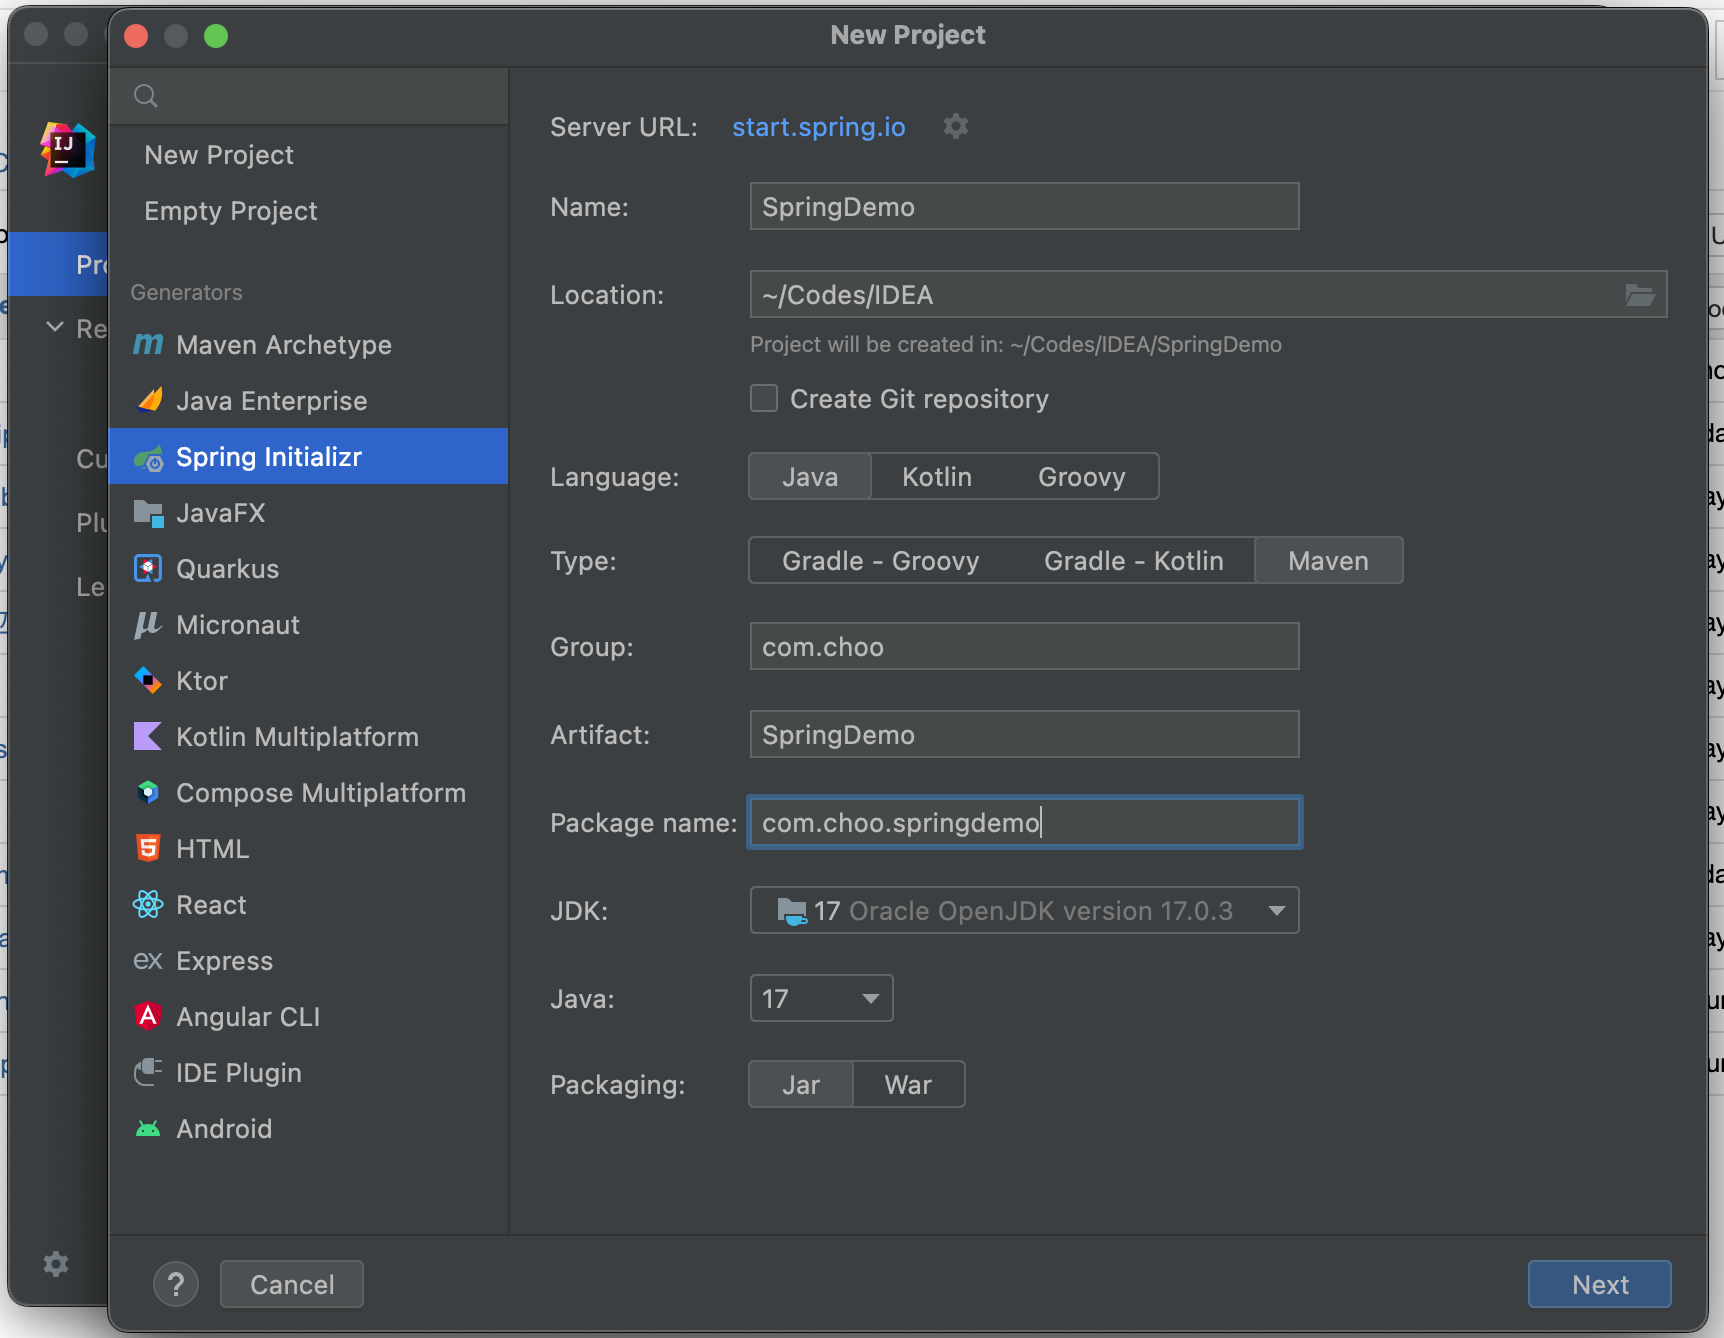

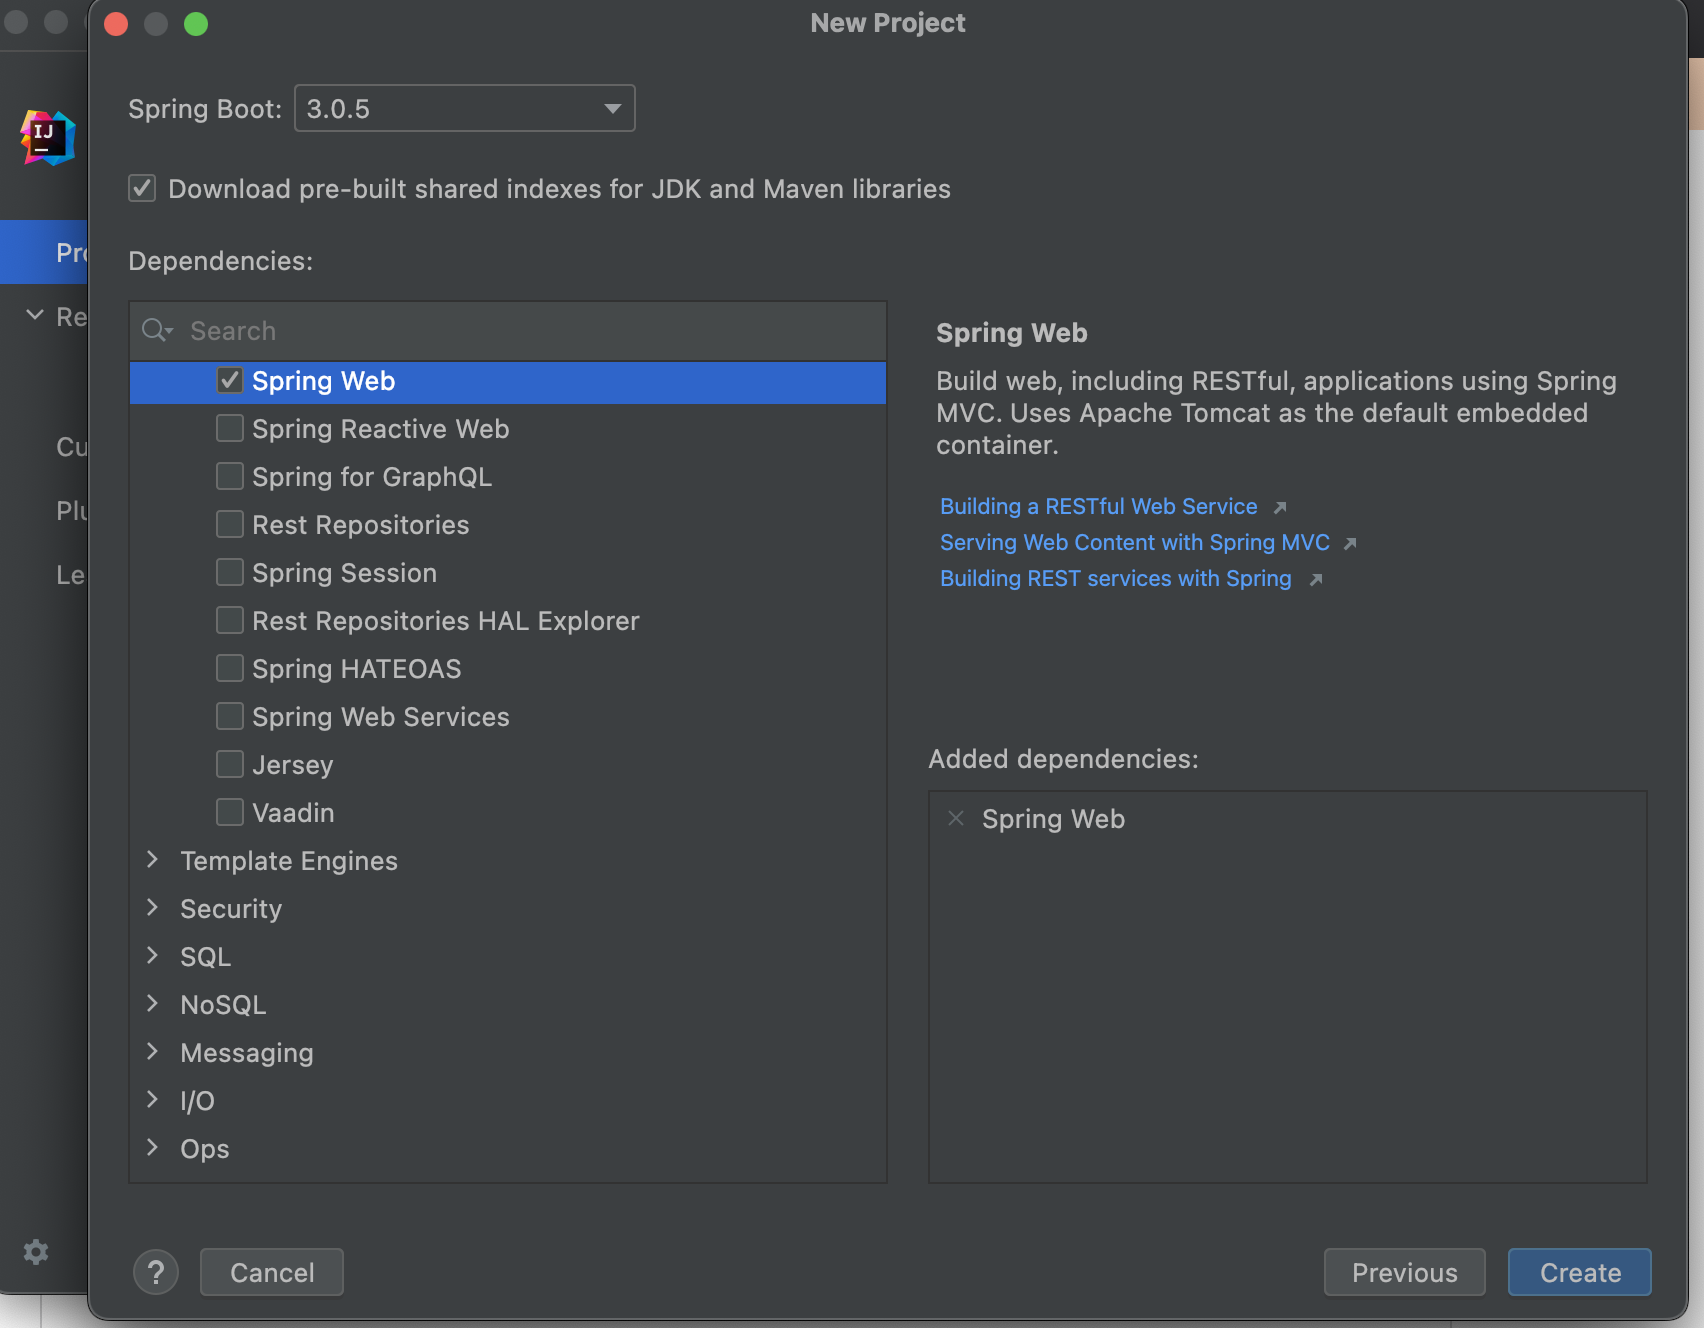

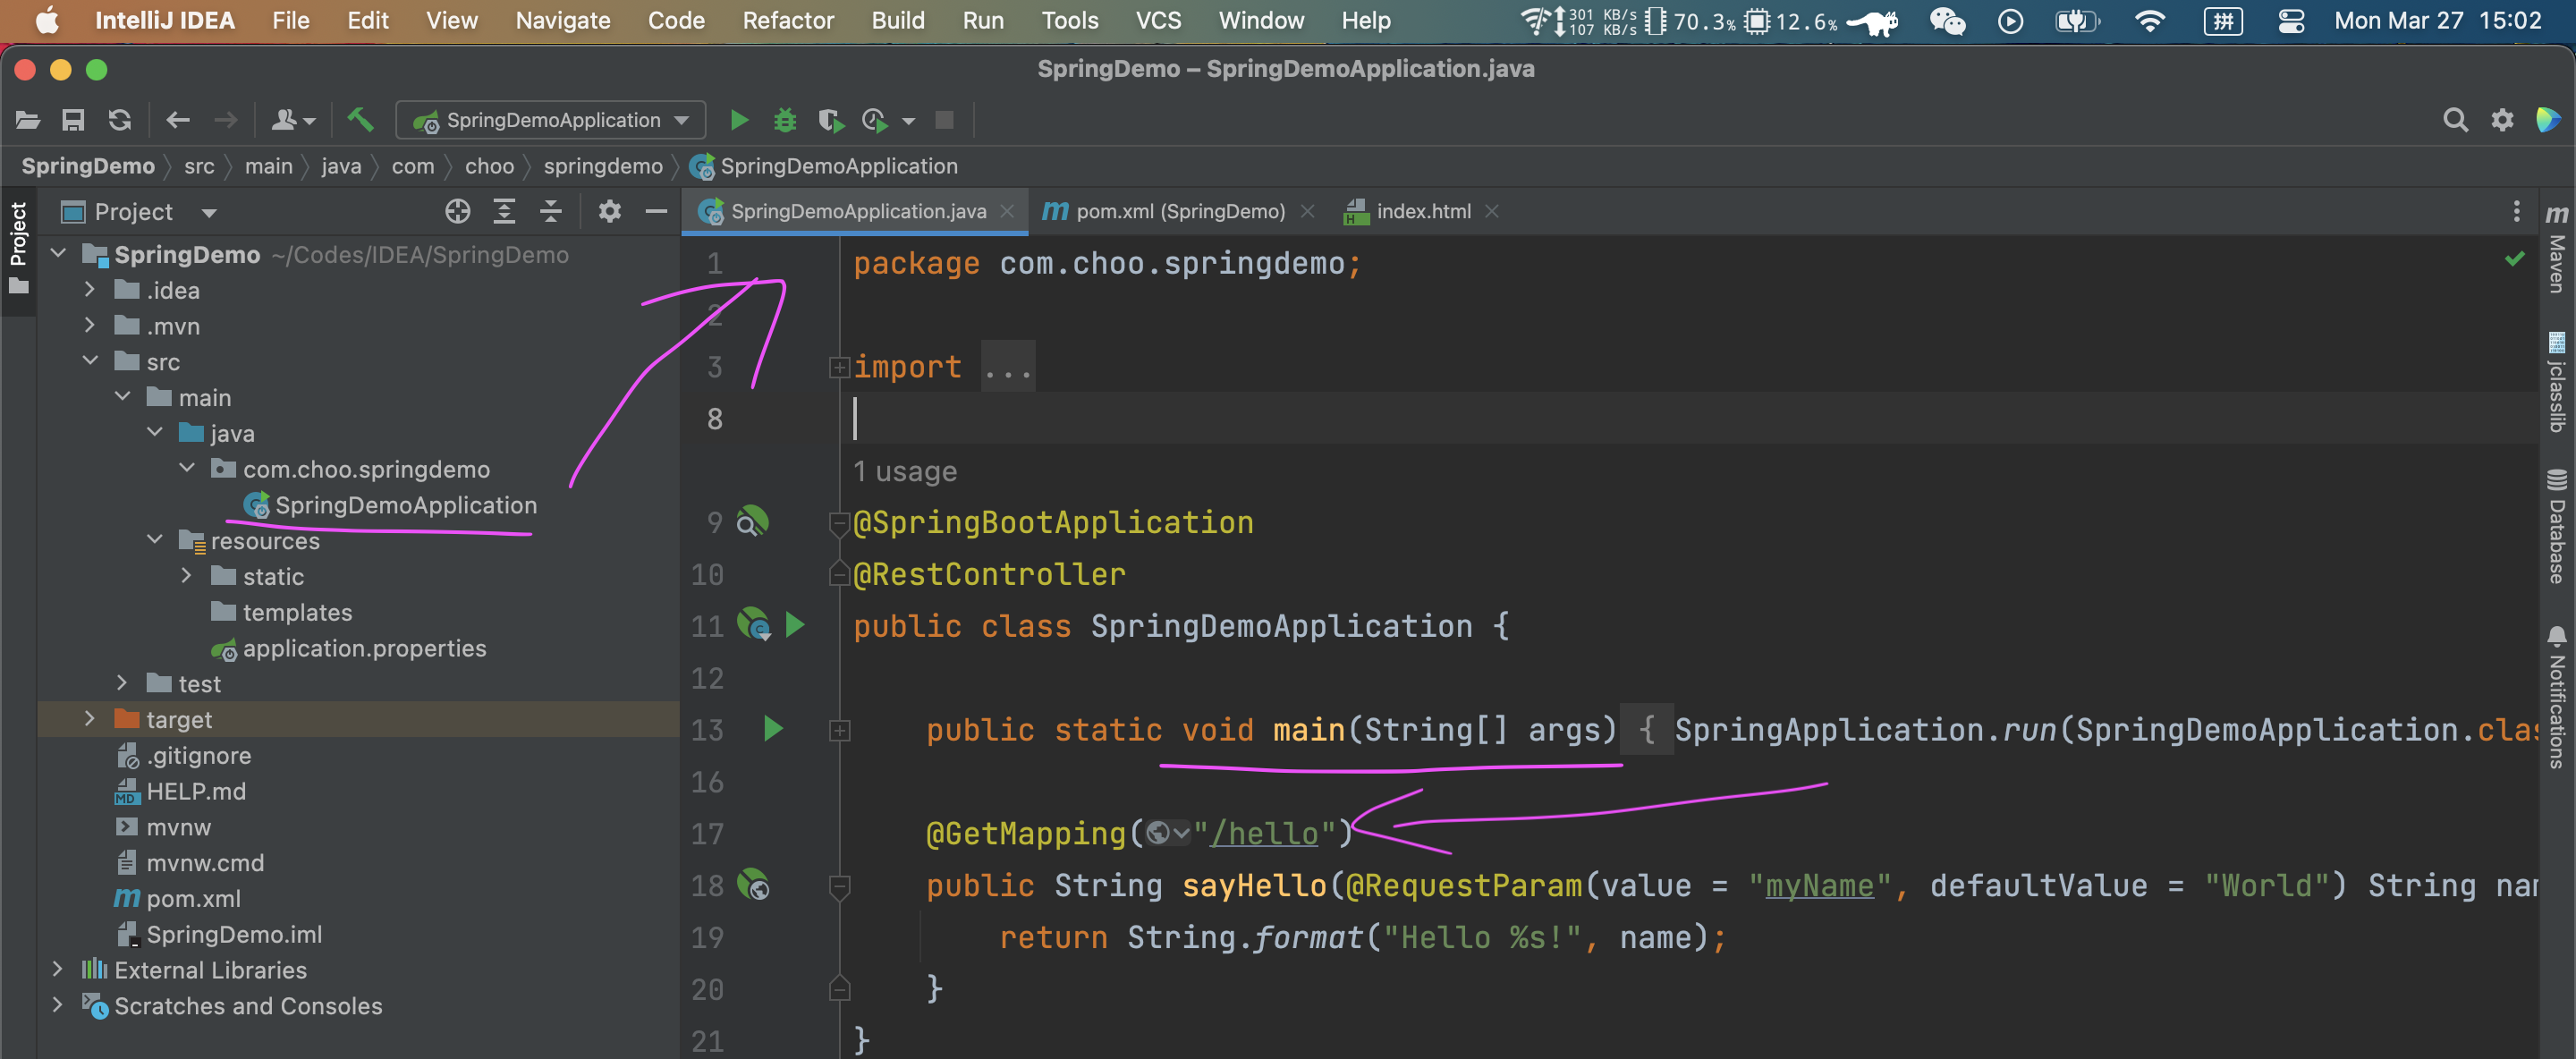

```java
package com.choo.springdemo;

@SpringBootApplication
@RestController
public class SpringDemoApplication {

    public static void main(String[] args) {
        SpringApplication.run(SpringDemoApplication.class, args);
    }

    @GetMapping("/hello")
    public String sayHello(@RequestParam(value = "myName", defaultValue = "World") String name) {
        return String.format("Hello %s!", name);
    }
}
```

- The `@RestController` annotation marks the `SpringDemoApplication` class as a request handler (a REST controller).

- The `@GetMapping("/hello")` annotation maps the `sayHello()` method to GET requests for `/hello`.

- The `@RequestParam` annotation **maps** the `name` method parameter **to** the `myName` web request parameter. If you don't provide the `myName` parameter in your web request, it will default to World. 注意, 这里的`myName`指的是客户端发过来的参数, 比如`http://localhost:8080/hello?myName=Human`

了解更多: [Create your first Spring application | IntelliJ IDEA](https://www.jetbrains.com/help/idea/your-first-spring-application.html)

## 1.1. Error in pom.xml

pom.xml有一段代码如下报错, 说是找不到`spring-boot-maven-plugin`, 
```xml
<plugin>
    <groupId>org.springframework.boot</groupId>
    <artifactId>spring-boot-maven-plugin</artifactId>
</plugin>
```

解决办法, 添加一句话就行, 

```xml
<plugin>
    <groupId>org.springframework.boot</groupId>
    <artifactId>spring-boot-maven-plugin</artifactId>
    <version>2.3.5.RELEASE</version>
</plugin>
```

# 2. Explore Spring Support Features
--- 

这里又证实了我上面的想法, 比如接下来的例子用到了Spring Data JPA module, 我不知道JPA是啥, 然后我就去查, 发现是Java EE的api, 然后解释如下:


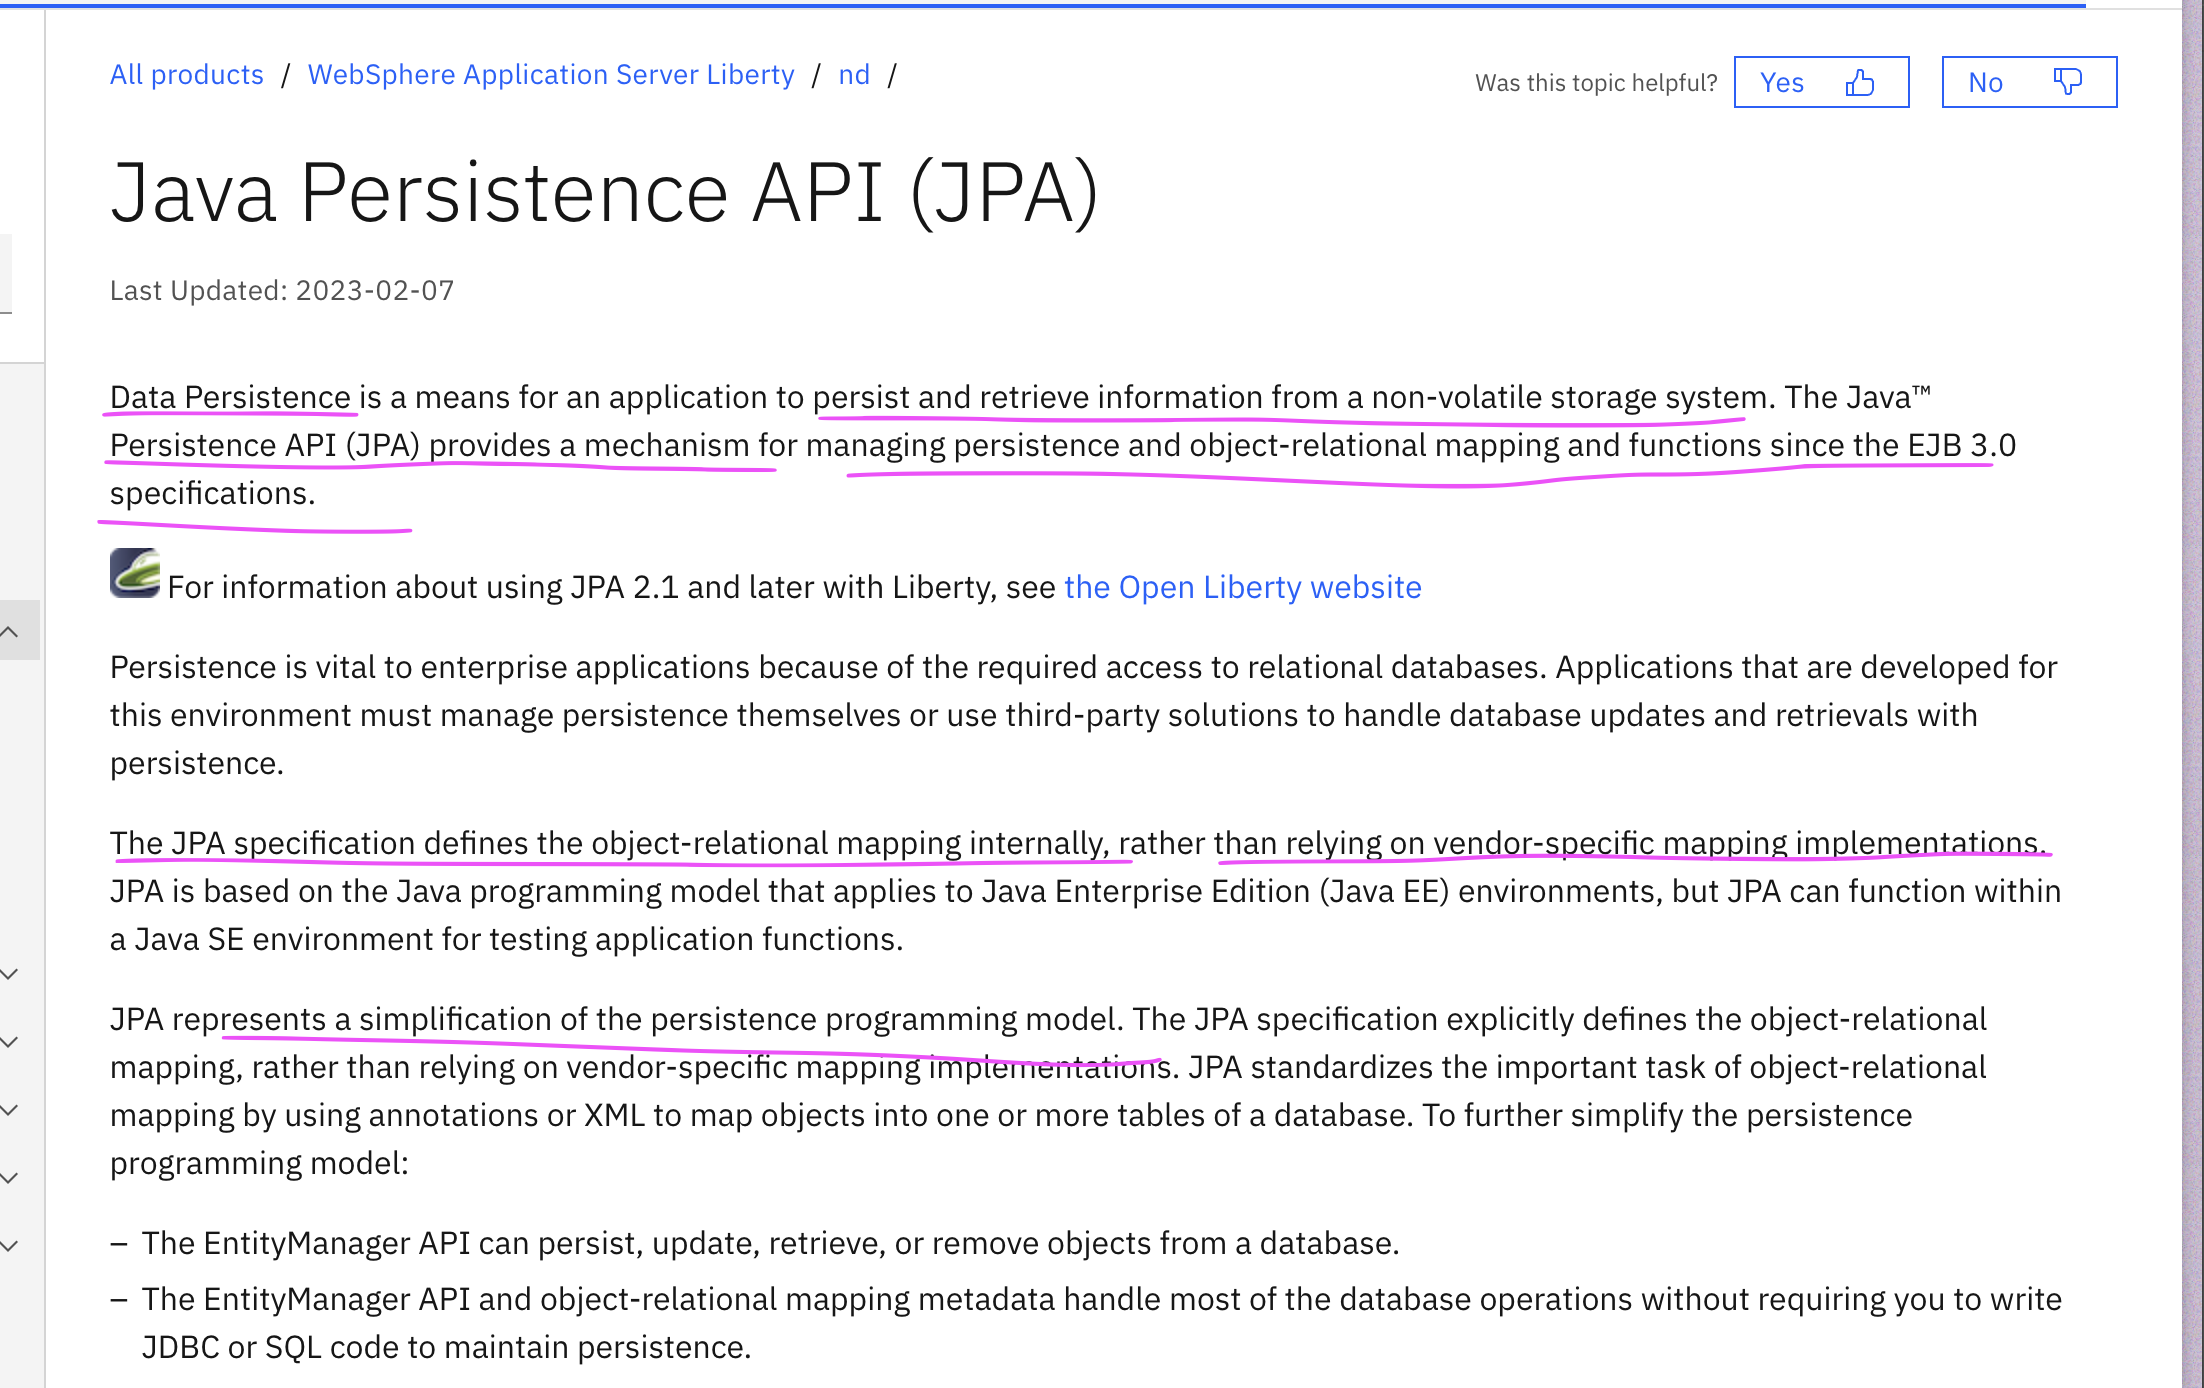

划线部分看的半懂非懂, 有的根本不知道在说啥, 如果我按照从基础开始的方法学习, 可能就看懂这一页的东西, 我得查一整天(还未必真正能理解, 因为没有实践), 然后再接着做这个新项目, 

而如果我要是直接时间, 不管JPA是啥, 直接跟着教程做, 然后做到后面会发现原来Spring Data JPA module就是Spring包装的Java EE的JPA, 为了更好用, 然后我还用到了数据库, 原来这个东西其实就是为了创建个类访问数据库的信息, 哎, 这不就懂了吗? 然后如果有需要或者感兴趣, 再去查JPA,这时候你心里已经有大概的框架逻辑, 自然也就比较容易理解JPA是什么, 也就会更高效, 因为你要学的东西都是一样的, 并不是说你先看基础后面的就不用花时间看, 都要看, 所以为何不选择一个更高效的顺序呢?

难道说先看了后面的用法, 再研究底层的基础知识, 就不容易掌握?, 不扯了, 接下来进入正题:

This tutorial guides you through steps that cover the following:

- Add dependencies for JPA and H2 that enable your Spring application to store and retrieve relational data

- Write and examine your code

- Run your application and execute HTTP requests

- Add Spring Boot Actuator for advanced health monitoring and endpoint analysis

- Add Spring Boot Developer Tools for faster application updates

之后的步骤请参考: 
- [Tutorial: Explore Spring support features | IntelliJ IDEA](https://www.jetbrains.com/help/idea/spring-support-tutorial.html)
- [Explore Spring support features | IntelliJ IDEA](https://www.jetbrains.com/help/idea/spring-support-tutorial.html)

# 3. 分析代码
---- 

根据[这个Tutorial](https://www.jetbrains.com/help/idea/spring-support-tutorial.html), 分别创建了以下代码:

```java
// Customer.java

package com.example.springboottutorial;
// The @Entity annotation indicates that the Customer class is a JPA entity that 
// should translate into the corresponding table in the database. 
@Entity
public class Customer {
    @Id
    @GeneratedValue(strategy = GenerationType.AUTO)
    private Integer id;

    private String firstName;
    private String lastName;
    // setter & getter
    // ...
}
```

The `@Entity` annotation indicates that the `Customer` class is a **JPA entity** that should translate into the corresponding table in the database. 

The `@Id` annotation indicates that the id field is the object's ID. The `@GeneratedValue` tells **JPA** that the ID should be generated automatically.


```java
// CustomerRepository.java
package com.example.springboottutorial;

public interface CustomerRepository extends CrudRepository<Customer, Integer> {

    Customer findCustomerById(Integer id);
}
```

This repository works with `Customer` entities and `Integer `IDs, 由上面代码中的`CrudRepository<Customer, Integer>`指明的. It also declares the `findCustomerById()` method. **Spring Data JPA** will derive a query based on this method's signature, which will select the `Customer` object for the specified ID. 

```java
// DemoController.java
package com.example.springboottutorial;

@RestController
public class DemoController {

    @Autowired
    private CustomerRepository customerRepository;

    @PostMapping("/add")
    public String addCustomer(@RequestParam String first, @RequestParam String last) {
        Customer customer = new Customer();
        customer.setFirstName(first);
        customer.setLastName(last);
        customerRepository.save(customer);
        return "Added new customer to repo!";
    }

    @GetMapping("/list")
    public Iterable<Customer> getCustomers() {
        return customerRepository.findAll();
    }

    @GetMapping("/find/{id}")
    public Customer findCustomerById(@PathVariable Integer id) {
        return customerRepository.findCustomerById(id);
    }
}
```

The `@Autowired` annotation tells Spring to inject the `customerRepository` bean. 

The `@RestController` annotation marks the DemoController class as a request handler (a REST controller). 


对于上面代码, 直接运行Spring程序(数据库也就是在pom.xml里添加一个依赖, 具体做法在[这个Tutorial](https://www.jetbrains.com/help/idea/spring-support-tutorial.html)可以找到), 就可以处理http请求了, 比如post添加用户, get查找以及按照id查找, 你不觉得这个也太省事了吗?

比如我们的程序肯定是跑在web server上的, 那我们怎么没有设置tomcat以及那些url什么的呢? 答案是Spring内集成了tomcat. 还有在每次我们查找用户或者添加用户的时候也没有连接断开数据库(Servlet的那一堆)什么先写sql语句, 再执行, 再处理数据返回json, 这直接就返回json数据了, 你可以用`GET http://localhost:8080/list`试试, 还有我们添加用户的时候是不是得指明first/last name, 比如`POST http://localhost:8080/add?first=Homer&last=Simpson` 但在上面的代码中我们仅仅是直接获得first/last参数的值, 并没有进行判断比如没有last这个参数呀之类的检查, 然后如果你客户端发出了不规范的请求, 我们的程序就会自动返回json数据, 告诉你 你的http request格式不对, 在感叹Spring强大的时候不仅感叹这是为什么? 答案肯定在那些各种奇奇怪怪的注解里面, 也在Spring强大的Dependency Injection里面, 想要弄懂肯定得把这些弄明白和透彻, 下面从Dependency Injection教程里摘抄的几句话, 或许可以给我们提供一些hints, 

This tutorial is aimed to provide details about Spring **Dependency Injection** example with both **annotation based configuration** and **XML file based configuration**. 也就是说Dependency Injection这个神奇的技术, 既可以通过注解来实现, 也可以通过xml配置文件来实现, 显然上面我们的代码是通过注解来实现的. 

`@Component` annotation is added to the class, so that **when Spring framework will scan for the components**, this class will be treated as component.

`@Autowired` annotation is used to let Spring know that **autowiring** is required. This can be applied to `field`, `constructor` and `methods`. This annotation allows us to implement **constructor-based, field-based or method-based dependency injection** in our **components**. 那么这是什么意思呢?

## 3.1. `@Autowired`

仔细看上面`DemoController.java`就会发现, 我们并没有初始它的field, 也就是`customerRepository`负责操作customer这张表的对象, 我们只是在上面加了个注解`@Autowired`, 然后`customerRepository`就被合理的初始化了, 所以暂且我们就把`@Autowired`当作指定Spring初始化的一个注解. 再回头看看上面那句话, `@Autowired` allows us to implement **constructor-based**, **field-based** or **method-based** dependency injection in our **components**. 原来`@Autowired`可以用在三个地方帮助我们自动初始化一个类(前提这个类被component类似的注解修饰)的Field, 直接在要被自动初始化的field前加`@Autowired`, 或者在该类的构造函数前加`@Autowired`, 或者在该field的setter方法前`@Autowired`:

下面就是, 三个人选一个初始化
```java
@Component
public class MyApplication {

	//field-based dependency injection
	//@Autowired
	private MessageService service;
	
//	constructor-based dependency injection	
//	@Autowired
//	public MyApplication(MessageService svc){
//		this.service=svc;
//	}
	
	@Autowired
	public void setService(MessageService svc){
		this.service=svc;
	}
	
	public boolean processMessage(String msg, String rec){
		//some magic like validation, logging etc
		return this.service.sendMessage(msg, rec);
	}
}
```

在写上面代码的时候, 遇到警告提醒, 这时候我们就知道怎么解决了, 直接添加一个setter, 然后给setter加上`@Autowired`就好了, 如下:

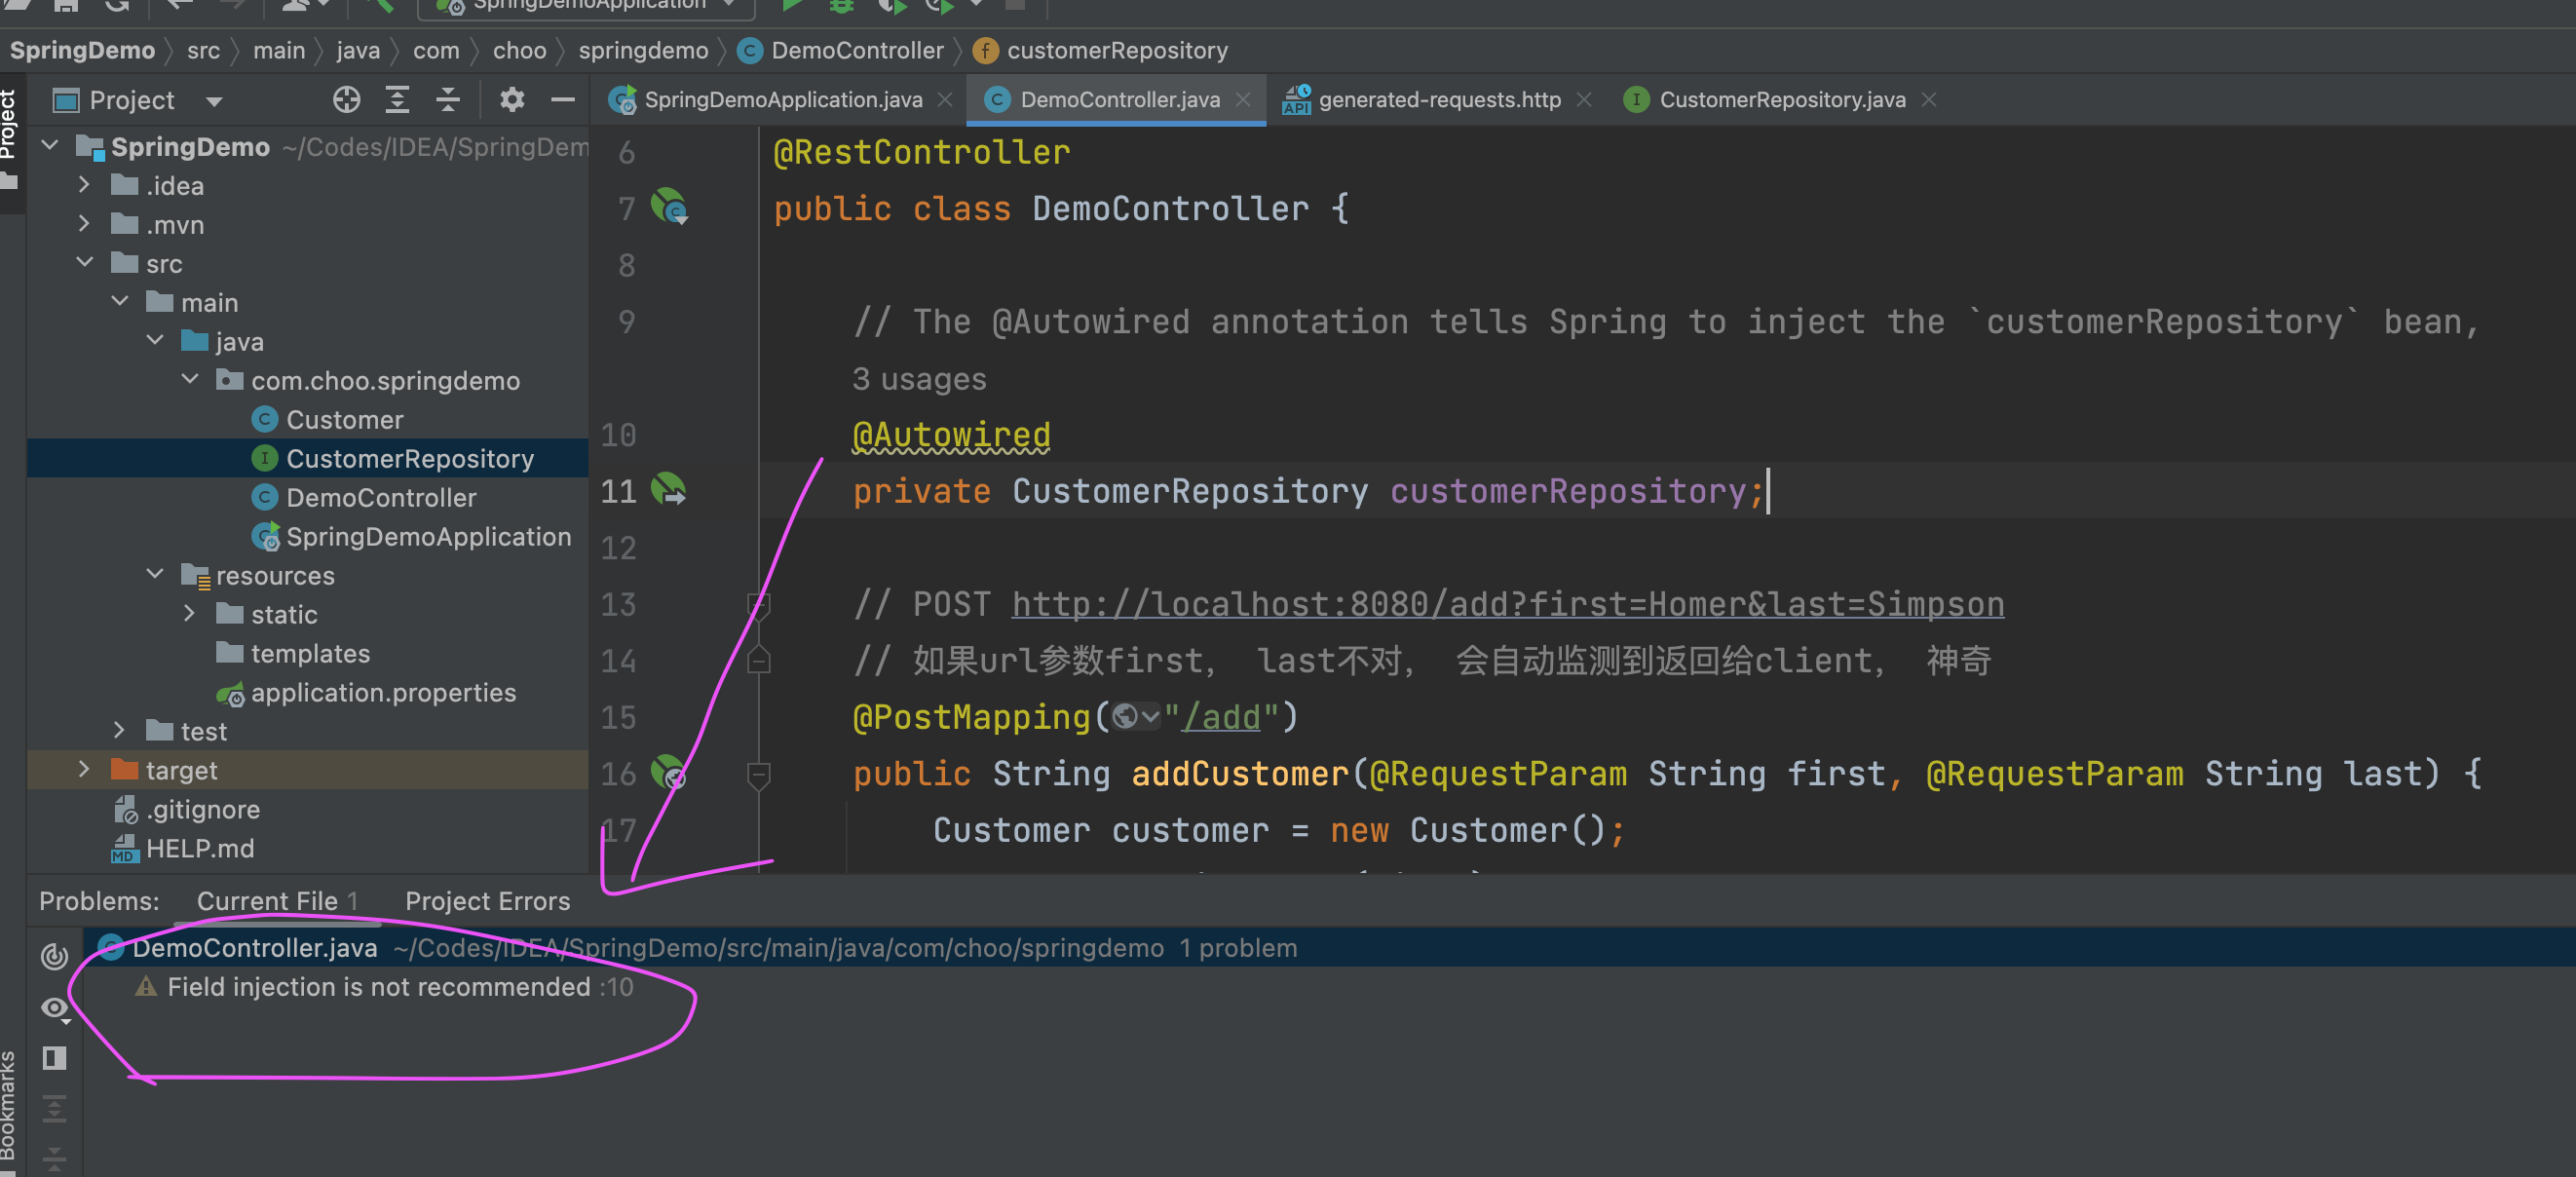

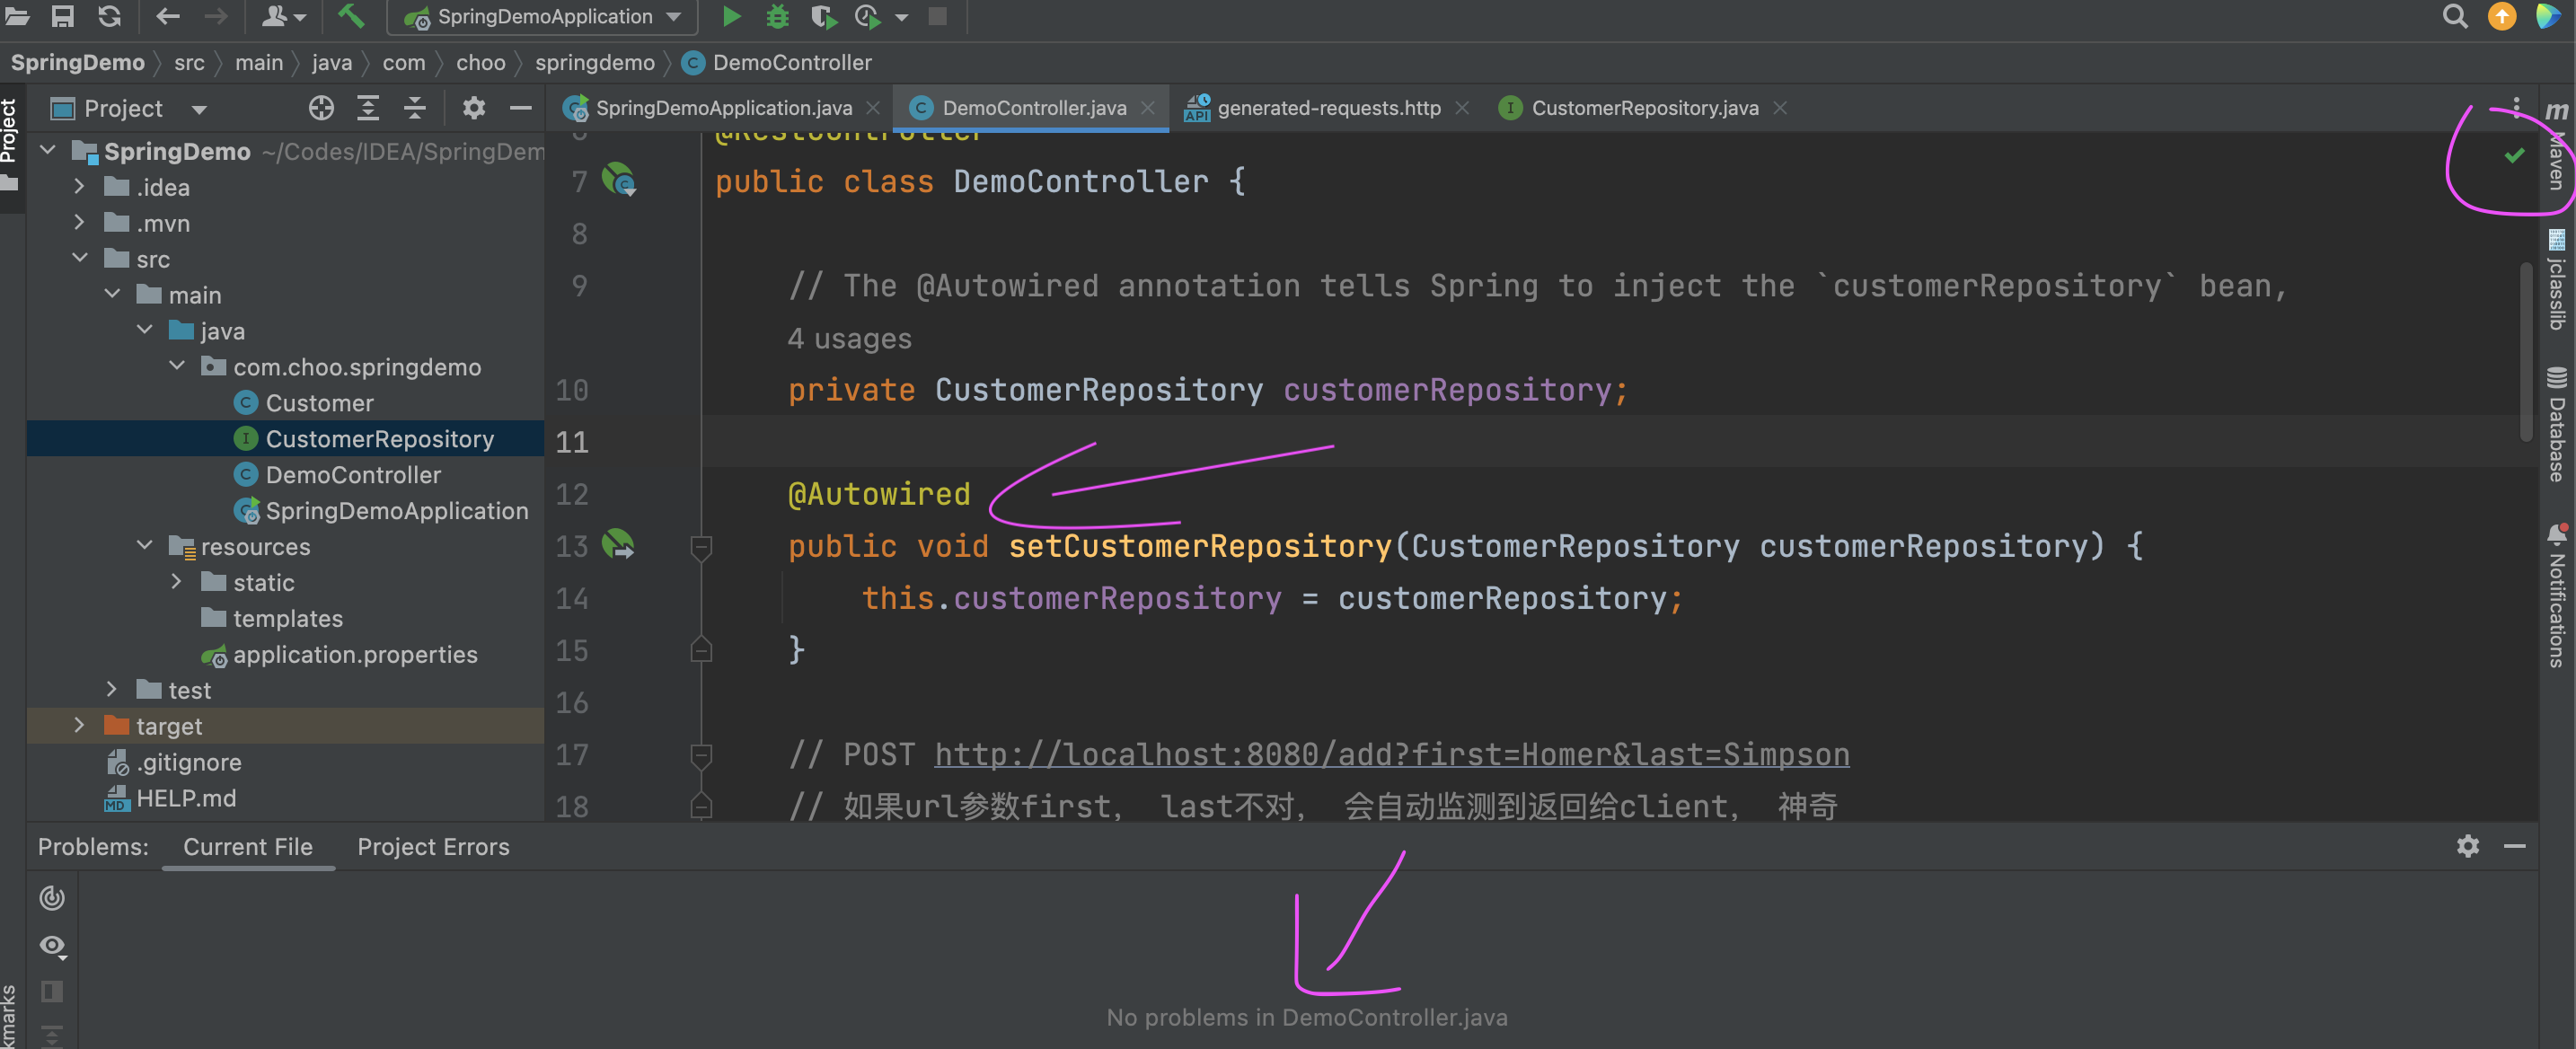

# 4. JPA
----

